###Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

###Loading data set from kaggle

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = "Your Kaggle Username"
os.environ['KAGGLE_KEY'] = "Your Kaggle API Key"

Downloading data set from kaggle

In [3]:
!pip install -q kaggle
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:24<00:00, 98.2MB/s]
100% 2.70G/2.70G [00:24<00:00, 121MB/s] 


unzip the data set

In [4]:
!unzip -q new-plant-diseases-dataset.zip

###Keras Image data loading


Training set

In [5]:
trainset = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
training = tf.keras.utils.image_dataset_from_directory(
    trainset,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


Validation set

In [6]:
validation = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
validation = tf.keras.utils.image_dataset_from_directory(
    validation,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


### Building the model

In [101]:
model = tf.keras.models.Sequential()

**Layers of CNN**

In [102]:
#Convolution layer (CONV)
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))

#Pooling (POOL)
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [103]:
#Convolution layer (CONV)
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))

#Pooling (POOL)
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [104]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [105]:
#Convolution layer (CONV)
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))

#Pooling (POOL)
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [106]:
#Convolution layer (CONV)
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))

#Pooling (POOL)
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [107]:
model.add(tf.keras.layers.Dropout(0.25))

In [108]:
model.add(tf.keras.layers.Flatten())

In [109]:
model.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [110]:
model.add(tf.keras.layers.Dropout(0.4))

In [111]:
#output layer
model.add(tf.keras.layers.Dense(units=38,activation='softmax'))

Compiling model

In [112]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [113]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

###Training model

In [59]:
trainingHistory = model.fit(x=training, validation_data=validation,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 155s 66ms/step - accuracy: 0.4102 - loss: 2.0852 - val_accuracy: 0.8294 - val_loss: 0.5309
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 132s 60ms/step - accuracy: 0.8309 - loss: 0.5380 - val_accuracy: 0.9080 - val_loss: 0.2858
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 131s 60ms/step - accuracy: 0.9042 - loss: 0.2992 - val_accuracy: 0.9277 - val_loss: 0.2240
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9343 - loss: 0.2061 - val_accuracy: 0.9344 - val_loss: 0.2138
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 60ms/step - accuracy: 0.9516 - loss: 0.1490 - val_accuracy: 0.9336 - val_loss: 0.2088
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 0.9619 - loss: 0.1142 - val_accuracy: 0.9425 - val_loss: 0.1825
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 132s 60ms/step - accuracy: 0.9675 - loss: 0.0983 - val_accuracy: 0.9348 - val_loss: 0.2189
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 132s 60ms/step - accuracy: 

###Model Evaluation

In [60]:
loss, accuracy = model.evaluate(training)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 0.9932 - loss: 0.0220


In [61]:
print(loss, accuracy)

0.020188715308904648 0.993769109249115


In [62]:
valLoss, valAccuracy = model.evaluate(validation)
print(valLoss, valAccuracy)

550/550 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9655 - loss: 0.1217
0.11365646868944168 0.967277467250824


###Saving Model

In [64]:
model.save("model.keras")

###Recording model history in json

In [65]:
trainingHistory.history

{'accuracy': [0.6066861152648926,
  0.8546696305274963,
  0.9126111268997192,
  0.9404082894325256,
  0.9542641639709473,
  0.9647912383079529,
  0.9696564674377441,
  0.9756454825401306,
  0.9798563122749329,
  0.9815776348114014],
 'loss': [1.331883192062378,
  0.4582713842391968,
  0.2687661945819855,
  0.18581144511699677,
  0.14114730060100555,
  0.1069660559296608,
  0.09183454513549805,
  0.0757196918129921,
  0.06301477551460266,
  0.056735217571258545],
 'val_accuracy': [0.8293876647949219,
  0.9079785943031311,
  0.9276690483093262,
  0.9343842267990112,
  0.9336444139480591,
  0.9425221681594849,
  0.9348395466804504,
  0.9611882567405701,
  0.9568063020706177,
  0.967277467250824],
 'val_loss': [0.5308629274368286,
  0.2857670783996582,
  0.22397993505001068,
  0.2137565314769745,
  0.20882278680801392,
  0.18246197700500488,
  0.2189355343580246,
  0.12261180579662323,
  0.14938636124134064,
  0.1136564239859581]}

In [67]:
import json
with open('trainingHistory.json','w') as f:
  json.dump(trainingHistory.history,f)

#Accuracy Visualization

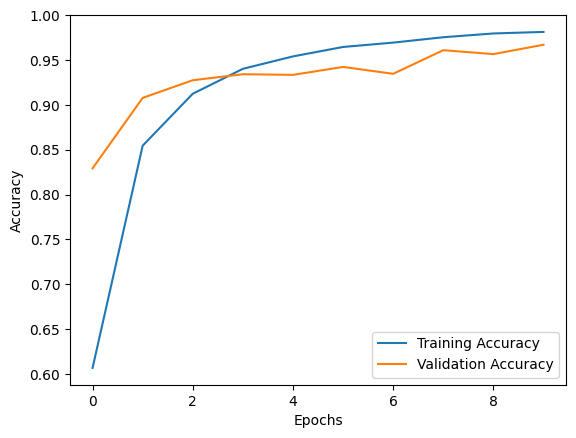

In [69]:
epochs = [i for i in range(10)]
plt.plot(epochs,trainingHistory.history['accuracy'],label='Training Accuracy')
plt.plot(epochs,trainingHistory.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###matrix

In [71]:
class_name = validation.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [75]:
validation = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_set = tf.keras.utils.image_dataset_from_directory(
    validation,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [77]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step


(array([[9.9999976e-01, 1.0262951e-07, 6.8269028e-12, ..., 4.9890102e-17,
         2.3949704e-15, 1.6394460e-14],
        [9.9998629e-01, 1.3540493e-05, 2.4099558e-10, ..., 1.9843614e-14,
         2.1984800e-13, 4.7188355e-13],
        [1.0000000e+00, 9.6058450e-10, 1.0728123e-12, ..., 5.7085860e-20,
         1.7965288e-17, 1.6479542e-15],
        ...,
        [1.2195823e-09, 6.9291740e-13, 3.1856423e-10, ..., 3.1434862e-11,
         1.2644376e-10, 9.9999428e-01],
        [9.0657988e-09, 2.2423177e-12, 5.9945704e-10, ..., 5.9238048e-10,
         2.6875732e-10, 9.9999428e-01],
        [1.7372591e-12, 5.3617723e-15, 6.9204358e-15, ..., 1.9728158e-16,
         4.2981298e-14, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [78]:
predicted_cat = tf.argmax(y_pred, axis=1)
predicted_cat

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [79]:
true_cat = tf.concat([y for x, y in test_set], axis=0)
true_cat

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [80]:
y_true = tf.argmax(true_cat, axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [81]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_true,predicted_cat, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.91      0.99      0.95       504
                                 Apple___Black_rot       1.00      0.95      0.97       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.99      0.93      0.96       502
                               Blueberry___healthy       0.98      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.94      0.99      0.97       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.92      0.92       410
                       Corn_(maize)___Common_rust_       0.97      1.00      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.96      0.

###Confusion Matrix Visualization

In [85]:
cn = confusion_matrix(y_true,predicted_cat)
cn.shape

(38, 38)

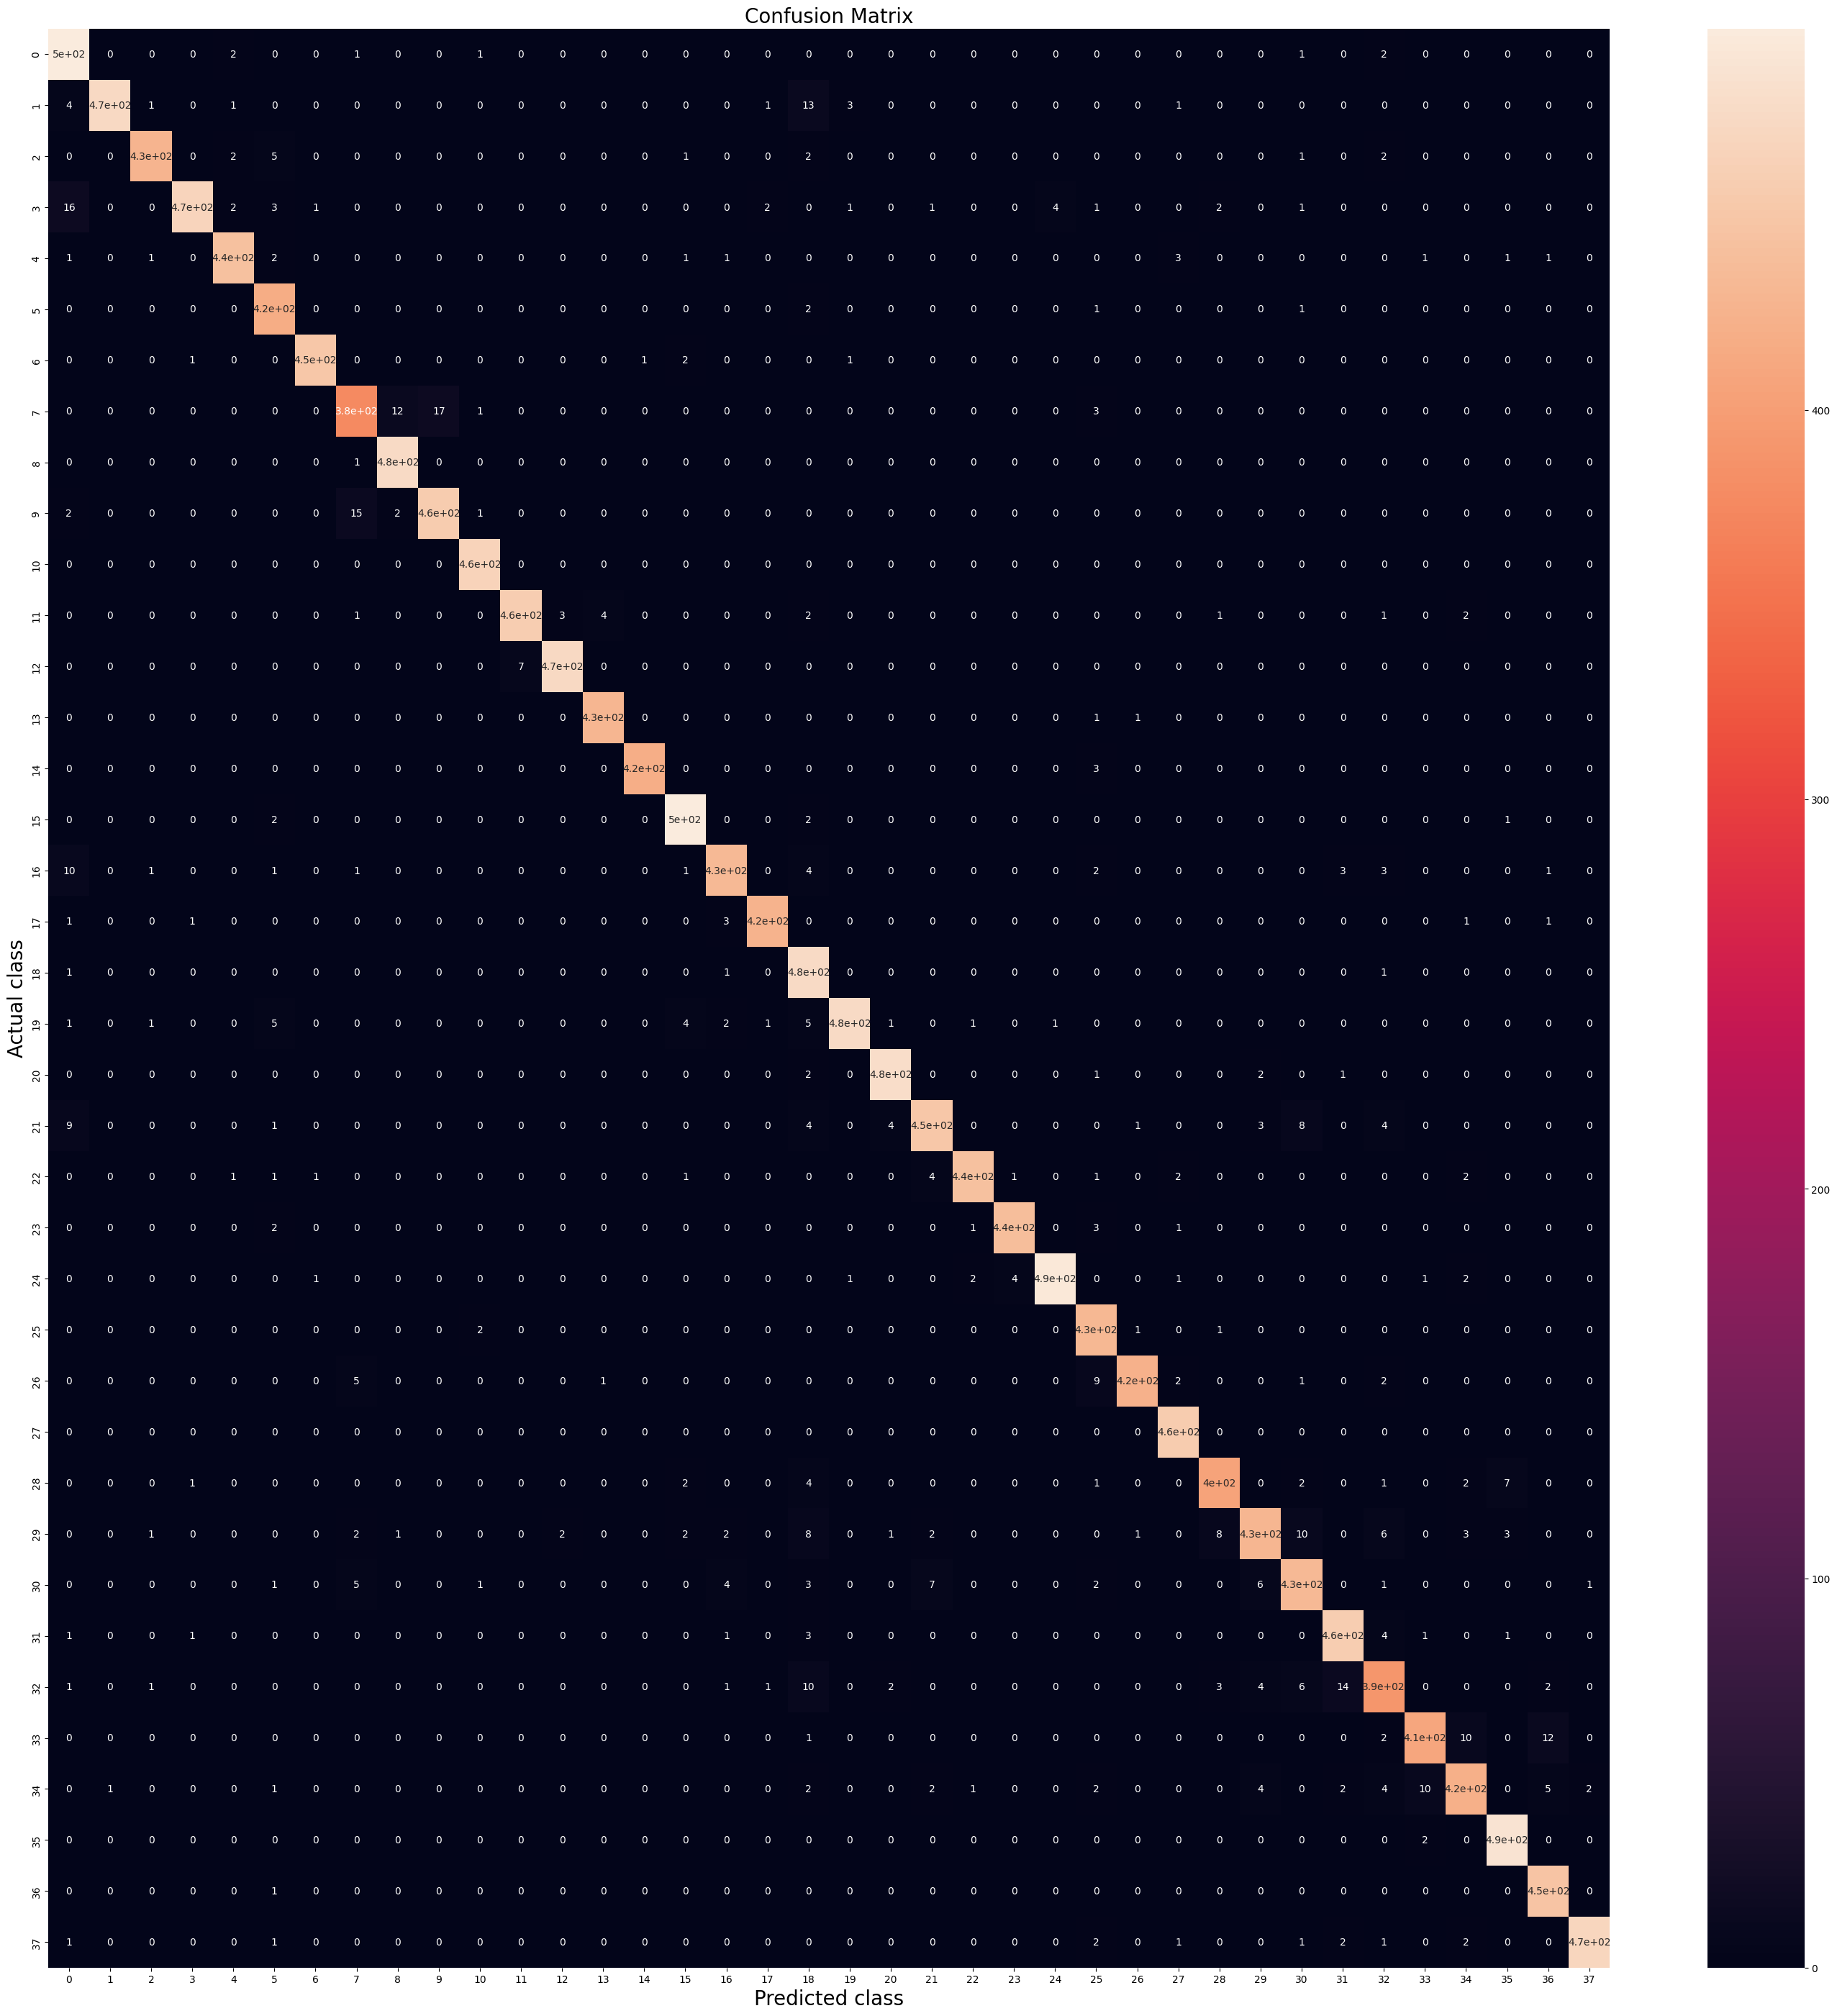

In [99]:
plt.figure(figsize=(35, 35))
sns.heatmap(cn, annot=True, annot_kws={'size':10})
plt.xlabel('Predicted class', fontsize = 20)
plt.ylabel('Actual class', fontsize = 20)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()